In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('crop_yield.csv')
print("Summary Statistics:\n", df.describe())
print(df)

Summary Statistics:
           Rainfall_mm  Temperature_Celsius  Days_to_Harvest  \
count  1000000.000000       1000000.000000   1000000.000000   
mean       549.981901            27.504965       104.495025   
std        259.851320             7.220608        25.953412   
min        100.000896            15.000034        60.000000   
25%        324.891090            21.254502        82.000000   
50%        550.124061            27.507365       104.000000   
75%        774.738520            33.753267       127.000000   
max        999.998098            39.999997       149.000000   

       Yield_tons_per_hectare  
count          1000000.000000  
mean                 4.649472  
std                  1.696572  
min                 -1.147613  
25%                  3.417637  
50%                  4.651808  
75%                  5.879200  
max                  9.963372  
       Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0        West     Sandy   Cotton   897.077239        

In [3]:
mean_yield = df['Yield_tons_per_hectare'].mean()
median_yield = df['Yield_tons_per_hectare'].median()
std_dev_price = df["Yield_tons_per_hectare"].std()

In [4]:
print(df['Region'].value_counts())
print(df['Soil_Type'].value_counts())
print(df['Crop'].value_counts())
print(df['Weather_Condition'].value_counts())

Region
North    250173
West     250074
South    250054
East     249699
Name: count, dtype: int64
Soil_Type
Sandy     167119
Loam      166795
Chalky    166779
Silt      166672
Clay      166352
Peaty     166283
Name: count, dtype: int64
Crop
Maize      166824
Rice       166792
Barley     166777
Wheat      166673
Cotton     166585
Soybean    166349
Name: count, dtype: int64
Weather_Condition
Sunny     333790
Rainy     333561
Cloudy    332649
Name: count, dtype: int64


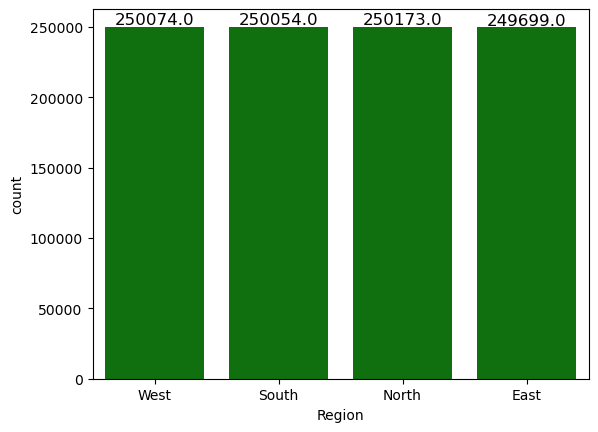

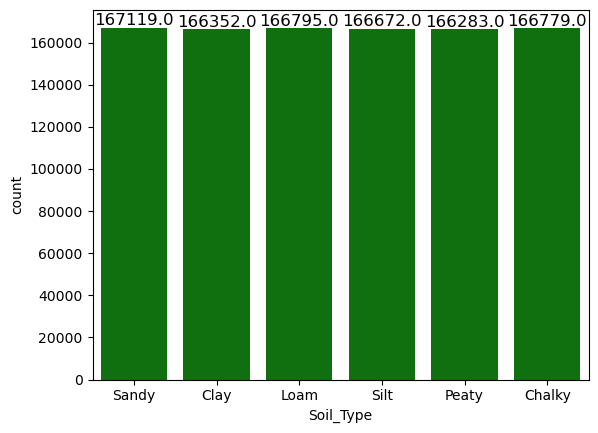

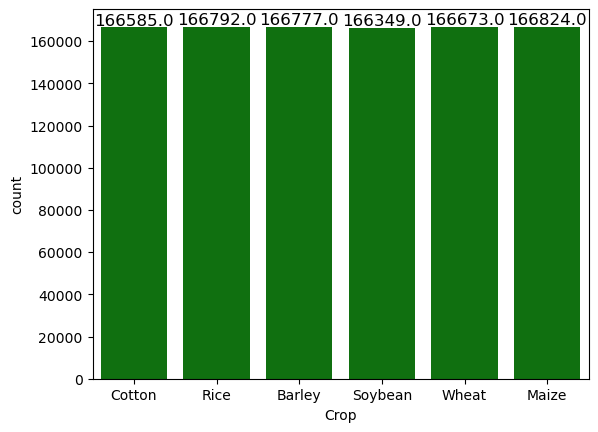

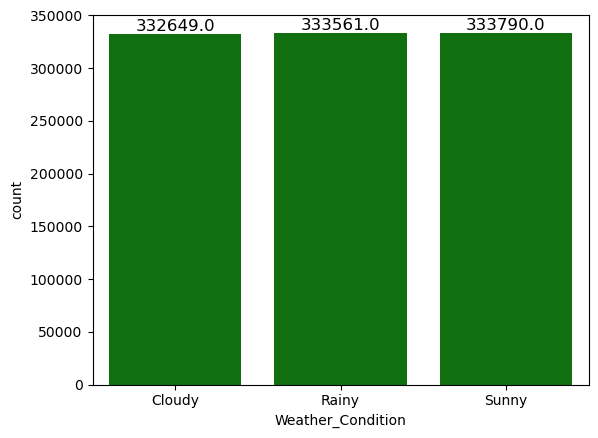

In [5]:
for column in ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']:
 ax = sns.countplot(data=df, x=f'{column}', color='green')
 for p in ax.patches:
     ax.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 fontsize=12, color='black',
                 xytext=(0, 5), textcoords='offset points')
 plt.show()

          Rainfall_mm  Temperature_Celsius  Days_to_Harvest  \
count  1000000.000000       1000000.000000   1000000.000000   
mean       549.981901            27.504965       104.495025   
std        259.851320             7.220608        25.953412   
min        100.000896            15.000034        60.000000   
25%        324.891090            21.254502        82.000000   
50%        550.124061            27.507365       104.000000   
75%        774.738520            33.753267       127.000000   
max        999.998098            39.999997       149.000000   

       Yield_tons_per_hectare  
count          1000000.000000  
mean                 4.649472  
std                  1.696572  
min                 -1.147613  
25%                  3.417637  
50%                  4.651808  
75%                  5.879200  
max                  9.963372  


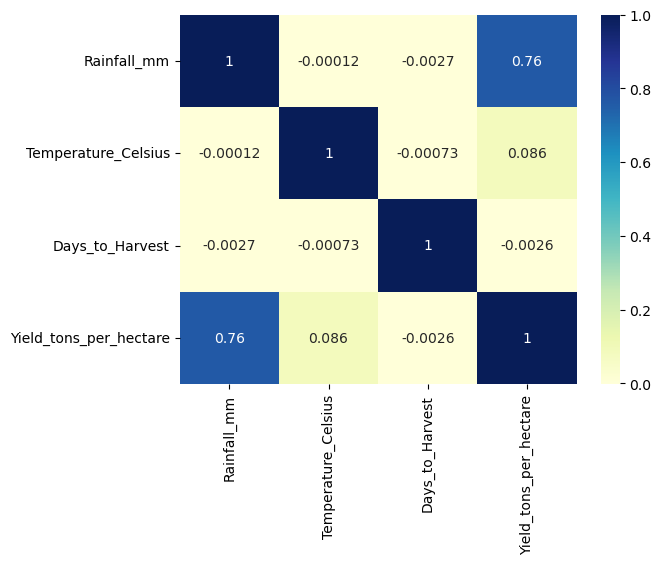

In [6]:
correlation_matrix = df[['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare']]
print(correlation_matrix.describe())
dataplot = sns.heatmap(correlation_matrix.corr(numeric_only=True), cmap="YlGnBu", annot=True)

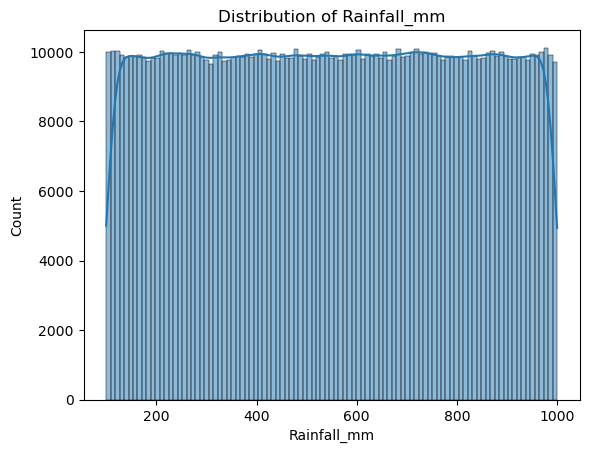

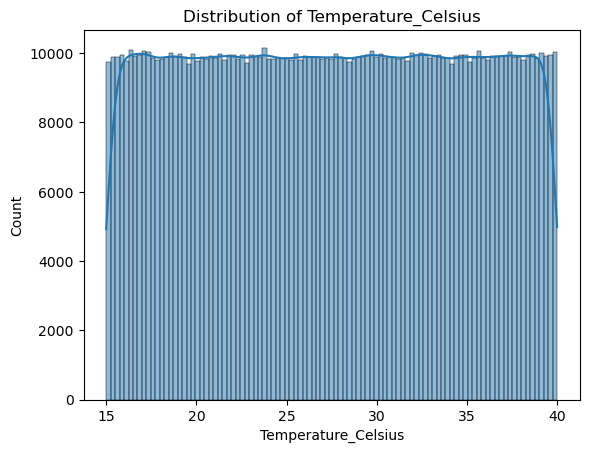

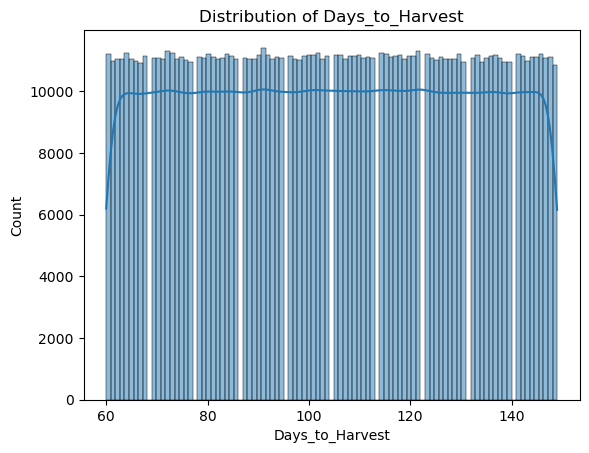

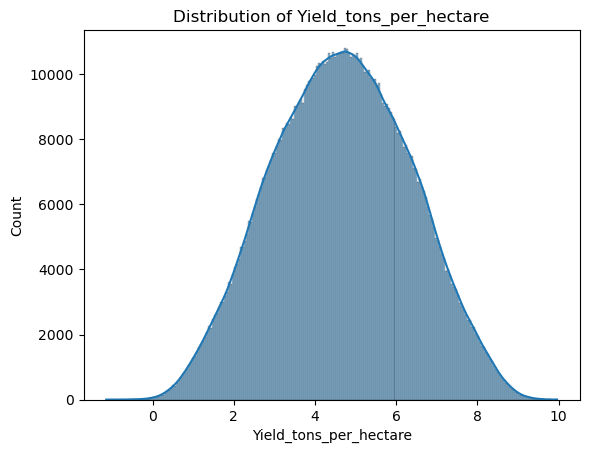

In [7]:
for column in ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare']:
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

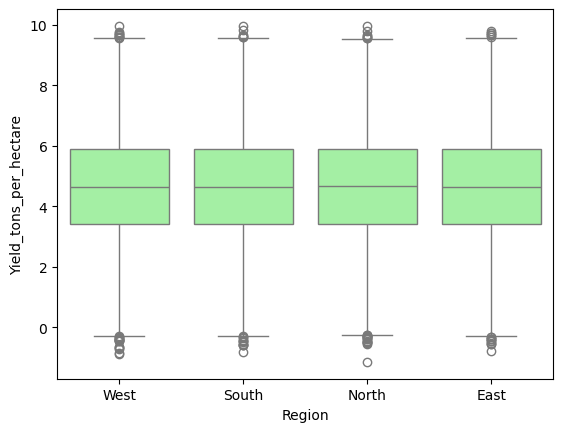

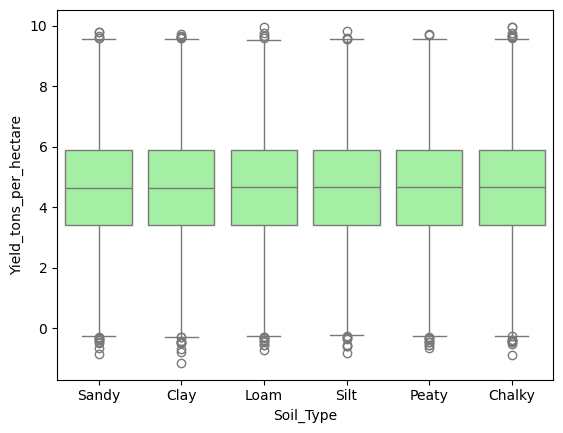

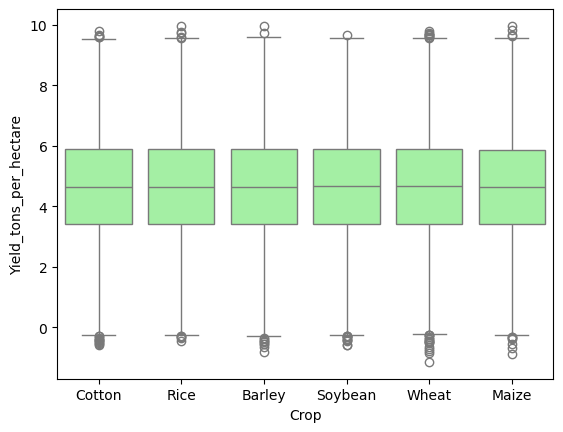

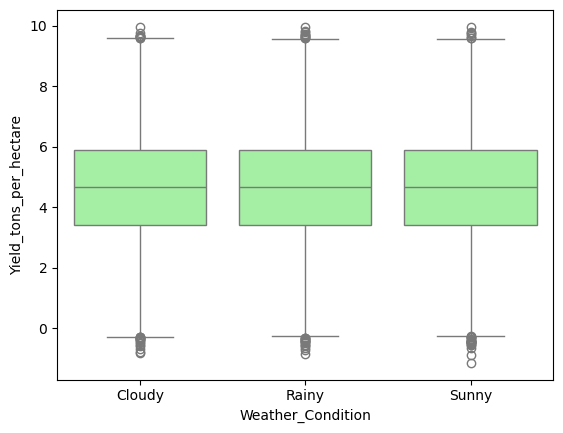

In [8]:
for column in ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']:
    sns.boxplot(data=df, x=f'{column}', y='Yield_tons_per_hectare', color='palegreen')
    plt.show()

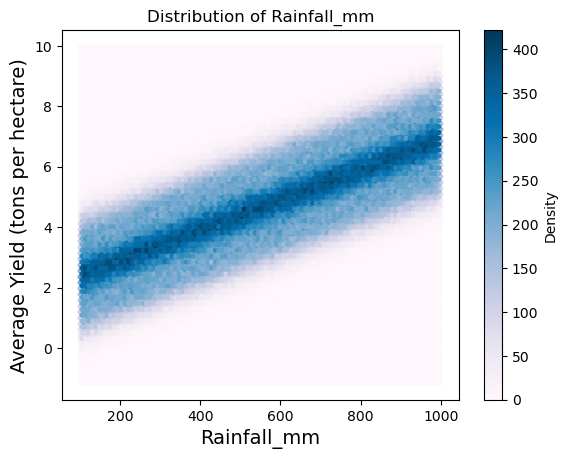

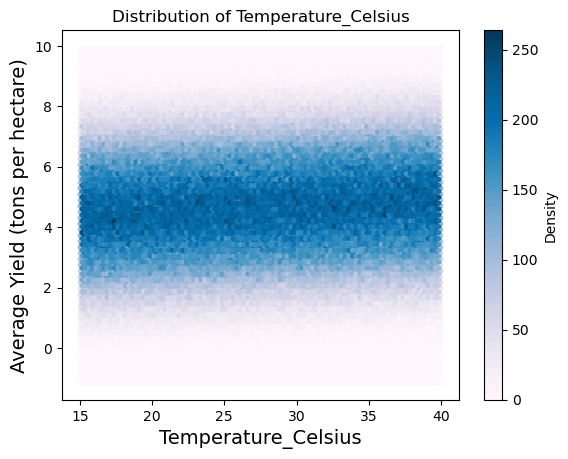

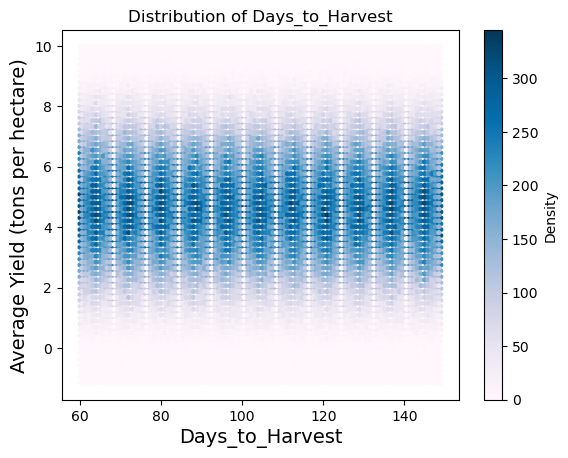

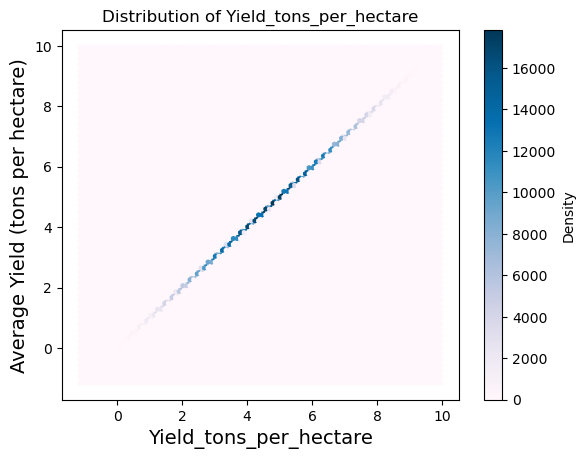

In [9]:
for column in ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare']:
    plt.hexbin(data=df, x=f'{column}', y='Yield_tons_per_hectare', cmap='PuBu')
    plt.title(f"Distribution of {column}")
    plt.xlabel(f'{column}', fontsize=14)
    plt.ylabel("Average Yield (tons per hectare)", fontsize=14)
    plt.colorbar(label='Density')
    plt.show()

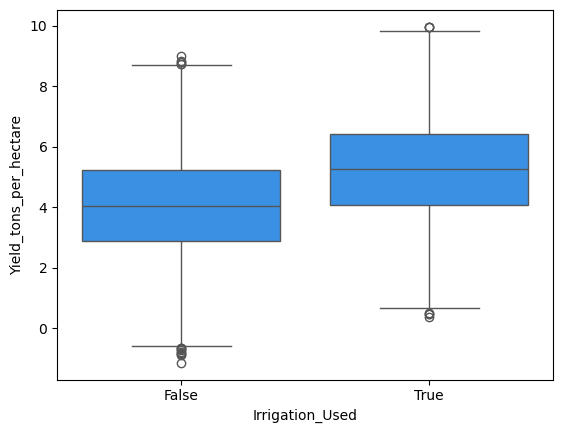

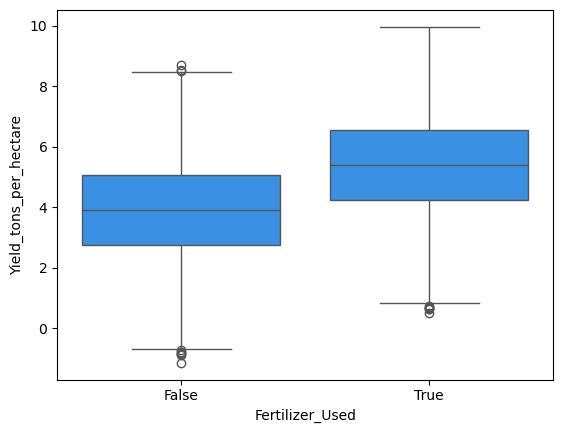

In [10]:
sns.boxplot(data=df, x='Irrigation_Used', y='Yield_tons_per_hectare', color='dodgerblue')
plt.show()
sns.boxplot(data=df, x='Fertilizer_Used', y='Yield_tons_per_hectare', color='dodgerblue')
plt.show()

Pivot data for heatmap

In [11]:
heatmap_data = df.pivot_table(
    index='Region',
    columns='Crop',
    values='Yield_tons_per_hectare',
    aggfunc='mean'
)

Create heatmap

<Axes: xlabel='Crop', ylabel='Region'>

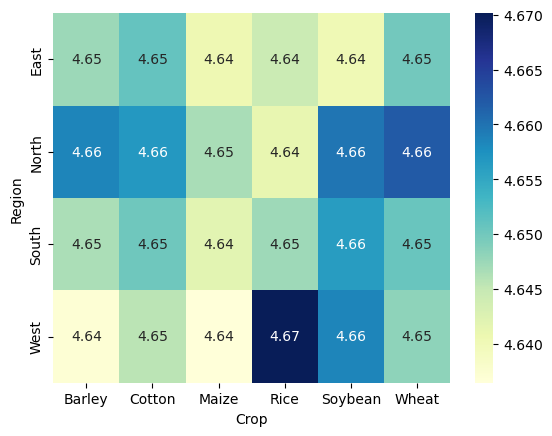

In [12]:
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f')

Add title and labels

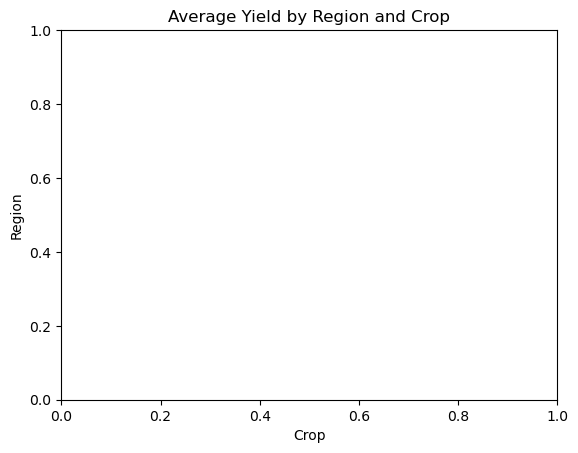

In [13]:
plt.title('Average Yield by Region and Crop')
plt.xlabel('Crop')
plt.ylabel('Region')
plt.show()

In [14]:
heatmap_data = df.pivot_table(
    index='Soil_Type',
    columns='Crop',
    values='Yield_tons_per_hectare',
    aggfunc='mean'
)

Create heatmap

<Axes: xlabel='Crop', ylabel='Soil_Type'>

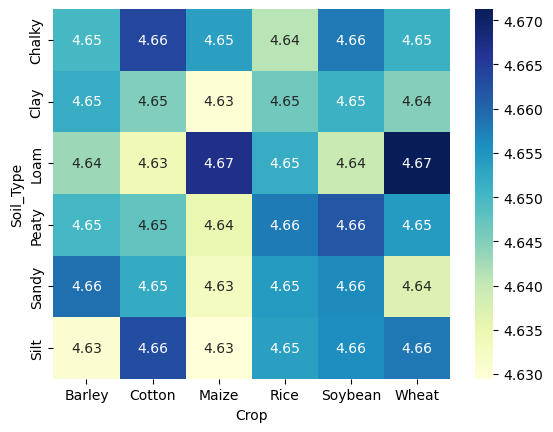

In [15]:
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f')

Add title and labels

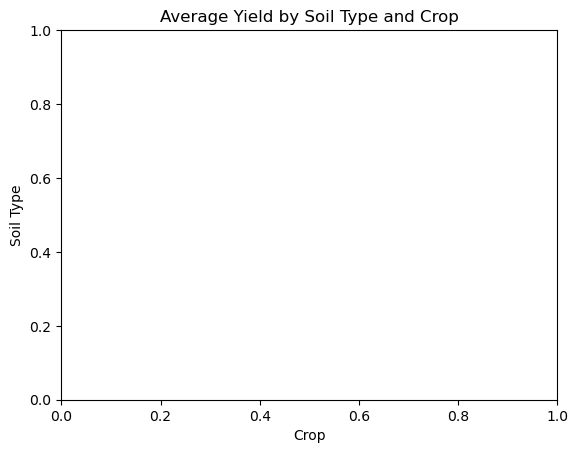

In [16]:
plt.title('Average Yield by Soil Type and Crop')
plt.xlabel('Crop')
plt.ylabel('Soil Type')
plt.show()

In [17]:
heatmap_data = df.pivot_table(
    index='Weather_Condition',
    columns='Crop',
    values='Yield_tons_per_hectare',
    aggfunc='mean'
)

Create heatmap

<Axes: xlabel='Crop', ylabel='Weather_Condition'>

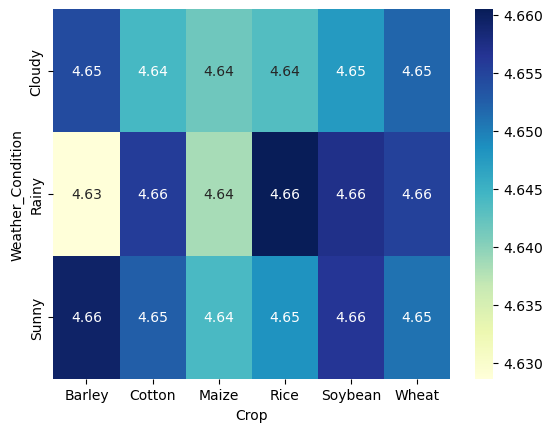

In [18]:
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f')

Add title and labels

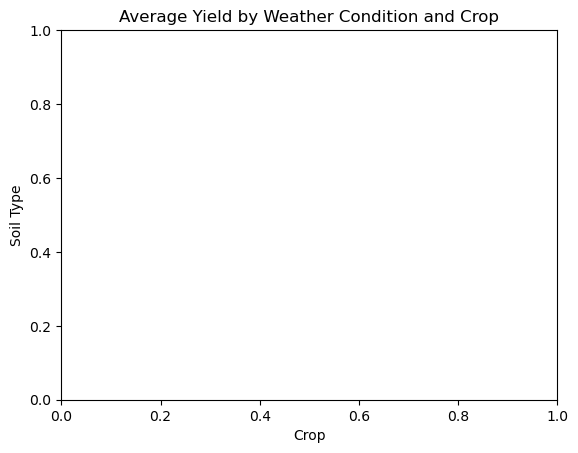

In [19]:
plt.title('Average Yield by Weather Condition and Crop')
plt.xlabel('Crop')
plt.ylabel('Soil Type')
plt.show()

In [20]:
heatmap_data = df.pivot_table(
    index='Irrigation_Used',
    columns='Soil_Type',
    values='Yield_tons_per_hectare',
    aggfunc='mean'
)

Create heatmap

<Axes: xlabel='Soil_Type', ylabel='Irrigation_Used'>

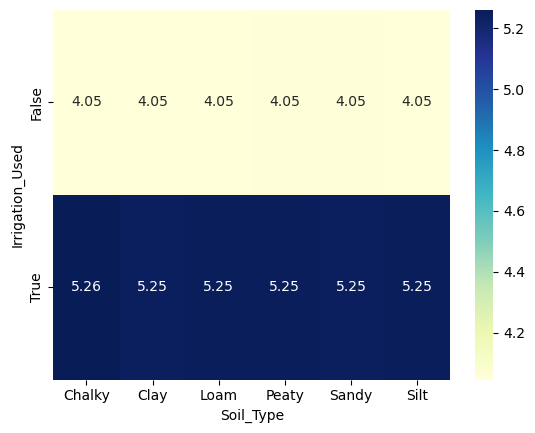

In [21]:
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f')

Add title and labels

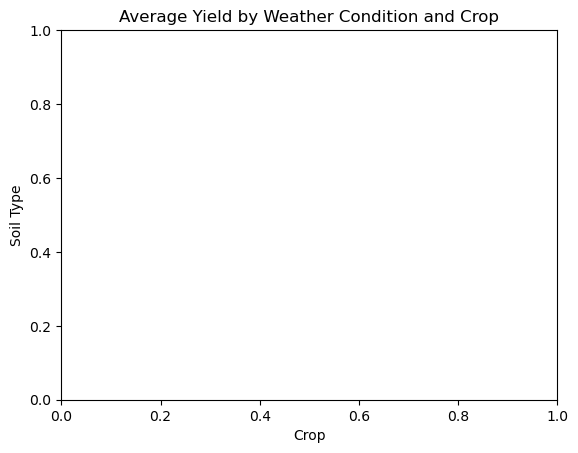

In [22]:
plt.title('Average Yield by Weather Condition and Crop')
plt.xlabel('Crop')
plt.ylabel('Soil Type')
plt.show()